In [32]:
import pandas as pd
import numpy as np
import glob
import seaborn as sb
import matplotlib.pyplot as plt

nameData = pd.read_csv("gender_refine-csv.csv")
all_files = glob.glob("/Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed" + "/*.csv")

### Congress by Gender

We read in the data and classify existing names based on a database from data.world

In [2]:
data = [[None, None, None, None, None, None, None]]
classified = pd.DataFrame(data, columns = ['Province', 'District', 'First', 'Last', 'Party', 'Year', 'Gender']) 
unclassified = pd.DataFrame(data, columns = ['Province', 'District', 'First', 'Last', 'Party', 'Year', 'Gender']) 

In [3]:
for item in all_files:
    print("Reading " + item)
    file = pd.read_csv(item)
    file['Gender'] = np.repeat(None, len(file['Province']))
    for i in range(len(file['Name'])):
        if sum(nameData['name']==file['First'][i])>0:
            x = np.where(nameData['name']==file['First'][i])[0][0]
            if nameData['gender'][x] == 1:
                file['Gender'][i] = 'Male'
            elif nameData['gender'][x] == 0:
                file['Gender'][i] = 'Female'
            else:
                file['Gender'][i] = 'Unidentified'  
        else:
            file['Gender'][i] = 'Unidentified'
    
    classified = classified.append(file.loc[file['Gender'] != 'Unidentified', ['Province', 'District', 'First', 'Last', 'Party', 'Year', 'Gender']])
    unclassified = unclassified.append(file.loc[file['Gender'] == 'Unidentified', ['Province', 'District', 'First', 'Last', 'Party', 'Year', 'Gender']])

Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_08.csv


/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel 

Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_09.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_10.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_11.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_12.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_13.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_14.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_15.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_16.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Congress/Processed/congress_processed_17.csv
Reading /U

All unclassified names are separated out. Names with classifications are then summarized by their suffix counts, and these are used to predict the genders of unclassified names.

In [4]:
classified = classified.iloc[1:,]
unclassified = unclassified.iloc[1:,]

In [5]:
mFeatures = {}
fFeatures = {}
def gender_features(name, gender):
    last_letter = name[-1].lower()
    suffix2 = name[-2:].lower()
    suffix3 = name[-3:].lower()
    
    if gender == 'Male':
        if last_letter in mFeatures:
            mFeatures[last_letter] += 1
        else:
            mFeatures[last_letter] = 1

        if suffix2 in mFeatures:
            mFeatures[suffix2] += 1
        else:
            mFeatures[suffix2] = 1
            
        if suffix3 in mFeatures:
            mFeatures[suffix3] += 1
        else:
            mFeatures[suffix3] = 1
    else:
        if last_letter in fFeatures:
            fFeatures[last_letter] += 1
        else:
            fFeatures[last_letter] = 1

        if suffix2 in fFeatures:
            fFeatures[suffix2] += 1
        else:
            fFeatures[suffix2] = 1
            
        if suffix3 in fFeatures:
            fFeatures[suffix3] += 1
        else:
            fFeatures[suffix3] = 1        

In [6]:
for item in zip(classified['First'],classified['Gender']):
    gender_features(item[0],item[1])

In [7]:
def matchGender(name):
    last_letter = name[-1].lower()
    suffix2 = name[-2:].lower()
    suffix3 = name[-3:].lower()
    
    mScore1 = False
    fScore1 = False
    mScore2 = False
    fScore2 = False
    mScore3 = False
    fScore3 = False
    
    if last_letter in mFeatures:
        mScore1 = mFeatures[last_letter]
    if last_letter in fFeatures:
        fScore1 = fFeatures[last_letter]
    if suffix2 in mFeatures:
        mScore2 = mFeatures[suffix2]
    if suffix2 in fFeatures:
        fScore2 = fFeatures[suffix2]
    if suffix3 in mFeatures:
        mScore3 = mFeatures[suffix3]
    if suffix3 in fFeatures:
        fScore3 = fFeatures[suffix3]
    
    if suffix3 == 'lyn':
        return 'Female'
    
    if mScore3 and fScore3:
        if mScore3 > fScore3:
            return 'Male'
        else:
            return 'Female'
    elif mScore2 and fScore2:
        if mScore2 > fScore2:
            return 'Male'
        else:
            return 'Female'
    elif mScore1 and fScore1:
        if mScore1 > fScore1:
            return 'Male'
        else:
            return 'Female'
    else:
        return 'Unidentified'

In [8]:
unclassified['Gender'] = [matchGender(item) for item in unclassified['First']]
data = classified.append(unclassified)
data.index = range(2412)
for i in range(len(data['Province'])):
    data['Province'][i] = str(data['Province'][i]).strip()
    data['District'][i] = str(data['District'][i]).strip()
    data['District'][i] = str(data['Party'][i]).strip()

Dataframes genderYear and genderProvince contain male-female proportions by year and province

In [9]:
genderYear = pd.crosstab(data['Year'], data['Gender']).apply(lambda r: round(100*(r/r.sum()),2), axis=1)
genderYear['Year'] = range(1989,2022,3)

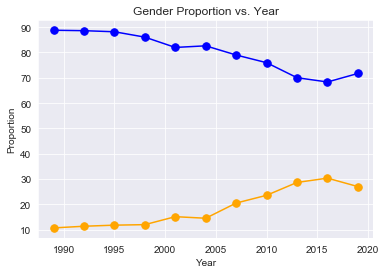

In [51]:
sns.set_style("darkgrid")
plt.plot(genderYear['Year'],genderYear['Female'], 'orange', marker=".", markersize=15)
plt.plot(genderYear['Year'],genderYear['Male'], 'blue', marker=".", markersize=15)
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Gender Proportion vs. Year')
plt.show()


In [80]:
genderProvince = pd.crosstab(data['Province'], data['Gender']).apply(lambda r: round(100*(r/r.sum()),2), axis=1)
genderProvince['Province'] = genderProvince.index.values
genderProvince['Province'] = genderProvince['Province'].str.upper()
import csv
genderProvince.to_csv('/Users/lorenzoflores/Desktop/Yale_Academic/genderProvince.csv')

### Political Dynasties: Parties & People
We then analyze which families and parties have maintained hold over provinces based on the congress representatives they have elected

Below, we group all the congress people by province and last name and summarize them. The most prominent last name over the years is listed in the table polPartyData.

In [11]:
polParties = {}
for i in range(len(data['First'])):
    prov = data['Province'][i]
    yr = data['Year'][i]
    last = data['Last'][i]
    
    if prov in polParties:
        if last in polParties[prov]:
            polParties[prov][last].append(yr)
            polParties[prov][last].sort()
        else:
            polParties[prov][last] = [yr]
    else:
        polParties[prov] = {}
        polParties[prov][last] = [yr]

In [17]:
polPartyData = []

for prov in polParties:
    maxName = ''
    maxCount = 0
    maxYears = ''
    for name in polParties[prov]:
        if len(set(polParties[prov][name])) > maxCount:
            maxName = name
            maxYears = set(polParties[prov][name])
            maxCount = len(set(polParties[prov][name]))
    polPartyData.append([prov, maxName, sorted(maxYears), maxCount])
    
polPartyData = pd.DataFrame(polPartyData, columns = ['Province', 'Name', 'Years', 'Count'])


Then, we group all the congress people by province and party and summarize them. The most prominent last name over the years is listed in the table provPartyData. 

We first clean the data by party name to get the main parties.

In [13]:
for i in range(len(data['Party'])):
    if 'aksyon' in data['Party'][i].lower():
        data['Party'][i] = 'Aksyon'
    elif 'independent' in data['Party'][i].lower():
        data['Party'][i] = 'Independent'
    elif 'ldp' in data['Party'][i].lower():
        data['Party'][i] = 'LDP'
    elif 'kbl' in data['Party'][i].lower():
        data['Party'][i] = 'KBL'
    elif 'pdp-laban' in data['Party'][i].lower():
        data['Party'][i] = 'PDP-Laban'
    elif 'lakas' in data['Party'][i].lower():
        data['Party'][i] = 'Lakas'
    elif 'liberal' in data['Party'][i].lower():
        data['Party'][i] = 'Liberal'
    elif 'npc' in data['Party'][i].lower():
        data['Party'][i] = 'NPC'
    elif 'nup' in data['Party'][i].lower():
        data['Party'][i] = 'NUP'
    elif 'nacionalista' in data['Party'][i].lower():
        data['Party'][i] = 'Nacionalista'
    elif 'pmp' in data['Party'][i].lower():
        data['Party'][i] = 'PMP'
    elif 'una' in data['Party'][i].lower():
        data['Party'][i] = 'UNA'
    elif 'reporma' in data['Party'][i].lower():
        data['Party'][i] = 'Reporma-LM'
    elif data['Party'][i].lower() == '' or data['Party'][i].lower() == ' ':
        data['Party'][i] = 'Independent'
    else:
        data['Party'][i] = data['Party'][i].strip()


In [14]:
provParties = {}
for i in range(len(data['Party'])):
    prov = data['Province'][i]
    yr = data['Year'][i]
    party = data['Party'][i]
    
    if prov in provParties:
        if party in provParties[prov]:
            provParties[prov][party].append(yr)
            provParties[prov][party].sort()
        else:
            provParties[prov][party] = [yr]
    else:
        provParties[prov] = {}
        provParties[prov][party] = [yr]

In [18]:
provPartyData = []

for prov in provParties:
    maxParty = ''
    maxCount = 0
    maxYears = ''
    for party in provParties[prov]:
        if len(set(provParties[prov][party])) > maxCount:
            maxParty = party
            maxYears = set(provParties[prov][party])
            maxCount = len(set(provParties[prov][party]))
    provPartyData.append([prov, maxParty, sorted(maxYears), maxCount])
    
provPartyData = pd.DataFrame(provPartyData, columns = ['Province', 'Party', 'Years', 'Count'])


In [81]:
polPartyData['Province'] = polPartyData['Province'].str.upper()
polPartyData.to_csv('/Users/lorenzoflores/Desktop/Yale_Academic/polPartyData.csv')

In [82]:
provPartyData['Province'] = provPartyData['Province'].str.upper()
provPartyData.to_csv('/Users/lorenzoflores/Desktop/Yale_Academic/provPartyData.csv')